In [ ]:
import cv2
import numpy as np
grayscale_image = cv2.imread('images/download.jfif', cv2.IMREAD_GRAYSCALE)
rgb_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2RGB)
rgb_image[:, :, 0] = 0
rgb_image[:, :, 1] = 3
rgb_image[:, :, 1] = 4

bgr_image_for_display = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
cv2.imshow('Grayscale image', grayscale_image)
cv2.imshow('Blue-Tinted 24-bit RGB Image', bgr_image_for_display)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Enhance Image - Convert from BGR to HSV

In [ ]:
# Convert from BGR to HSV
hsv_image = cv2.cvtColor(bgr_image_for_display, cv2.COLOR_BGR2HSV)

### 1. Modify HSV image's Hue

In [ ]:
# Get hue shift value from the user
hue_shift = int(input('Enter the hue shift value (0-179): '))

# Modify the hue channel
hue_channel = hsv_image[:, :, 0]
hue_channel = (hue_channel + hue_shift) % 180
hsv_image[:, :, 0] = hue_channel


### 2. Modify HSV image's Saturation

In [ ]:
# Ask the user for the saturation effect with the use input
multiplier = float(input("Enter the stauration multiplier (e.g. 1.5): "))

# Effect of saturation
saturation_channel = hsv_image[:, :, 1]

# Apply the saturation effect with the user input
saturation_channel = np.clip(saturation_channel * multiplier, 0, 255)

hsv_image[:, :, 1] = saturation_channel

### 3. Modify HSV Image's Value

In [ ]:
# Get user imput for the value adjustment
value_adjustment = int(input('Enter the value adjustment amount: '))

# Effect of value
value_channel = hsv_image[:, :, 2]
value_channel = np.clip(value_channel +  value_adjustment, a_min=0, a_max=255)
hsv_image[:, :, 2] = value_channel

In [ ]:
# Convert back to BGR
modified_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Display the images
cv2.imshow('OG Image', bgr_image_for_display)
cv2.imshow('Modified Image', modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## TV Regularization - Denoise Images

In [ ]:
import cv2
from skimage.restoration import denoise_tv_chambolle
noised_img = cv2.imread('images/noised_image.jpg', cv2.IMREAD_GRAYSCALE)

lambda_reg = 0.2
denoised_img = denoise_tv_chambolle(noised_img, weight = lambda_reg)
cv2.imshow('OG image', noised_img)
cv2.imshow('Denoised image', denoised_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


## RLE Compression

In [34]:
import cv2
import numpy as np
def rle_compression(image):
    """Compresses image data using RLE compression algorithm"""
    encoded_img= []
    counter = 1

    for i in image[1:]:
        if (image[i] == image[i-1]):
            counter += 1
        else:
            encoded_img.extend([counter, image[i]])
            counter = 1
    encoded_img.extend([counter, image[i]])
    return encoded_img


image = np.ones((30,30), dtype=np.uint8)*255

cv2.imshow('OG Gray Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

pixels = image.flatten()

compressed_data = rle_compression(pixels)

np.save('compressed_img', compressed_data)
print('OG Image Size', len(image))
print('Compressed Image Size: ',  len(compressed_data))

OG Image Size 30
Compressed Image Size:  2


# Draw Shapes
- if thickness = -1 => shape filled with the same color as its border
- when we want to fill the shape with a diff color than the border using .floodFill() 
  - if seed point = a point outside the boundries/shape => BG of the shape filled
  - else => shape filled from the inside

## Draw a Straight Line

In [2]:
import cv2
import numpy as np

# Create a blank white image
image = np.ones((500, 500, 3),dtype=np.uint8) * 255

# Define the starting and ending coordinates of the line
start_point = (300, 10) # Starting coordinates
end_point = (10, 400) # Ending coordinates

# Define the color (Red in BGR format) and thickness of the line
color = (0, 0, 255) # Red color in BGR
thickness = 5 # Thickness of the line

# Draw the line on the image
cv2.line(image, start_point, end_point, color, thickness)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Draw Reversed Line

In [3]:
import cv2
cv2.line(image, (10,10), (300,400), (100, 0, 0), thickness)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Draw a Circle

In [4]:
center = (150, 200)
cv2.circle(image, center, 50, (100, 0, 0), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Draw a Rectangle

In [5]:
cv2.rectangle(image, start_point, end_point, color, thickness)
cv2.imshow('Final Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Resize a shape

## Rotate an Image - cv2.getRotationMatrix2D()

In [6]:
# Define the center of rotation, angle, and scale
rotation_center = (image.shape[1] // 2, image.shape[0] // 2)

angle = 90 # Rotation angle in degrees
scale = 1.0 # Scale factor

rotation_matrix = cv2.getRotationMatrix2D(rotation_center, angle, scale)

rotated_img = cv2.warpAffine(image, rotation_matrix, dsize=(image.shape[1], image.shape[0]))

cv2.imshow('Rotated Image', rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Masks
- Fill a Shape w/ a Diff. Color than its Borders

In [7]:
# Define the seed point and fill color
seed_point = (200, 200)

fill_color = (0, 255, 0)

mask = np.zeros((502, 502), dtype=np.uint8)

cv2.floodFill(image, mask, seed_point, fill_color)

cv2.imshow('Filled Rectangle', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## FIR Audio Filter

Matplotlib is building the font cache; this may take a moment.


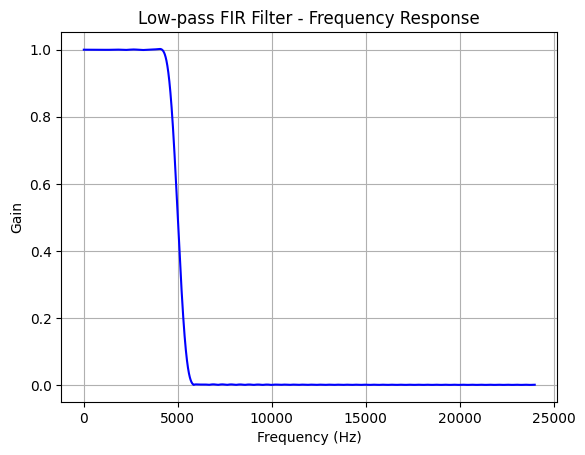

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

cutoff = 5000
fs = 48000
numtaps = 101


coeffs = firwin(numtaps, cutoff/(0.5*fs), window= 'hamming')

# Plot the frequency response\
w, h = freqz(coeffs, worN = 8000)
plt.plot(0.5*fs*w / np.pi, np.abs(h), 'b')
plt.title('Low-pass FIR Filter - Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()
plt.show()

## Add Gaussian Noise

Text(0.5, 1.0, 'Denoised Image')

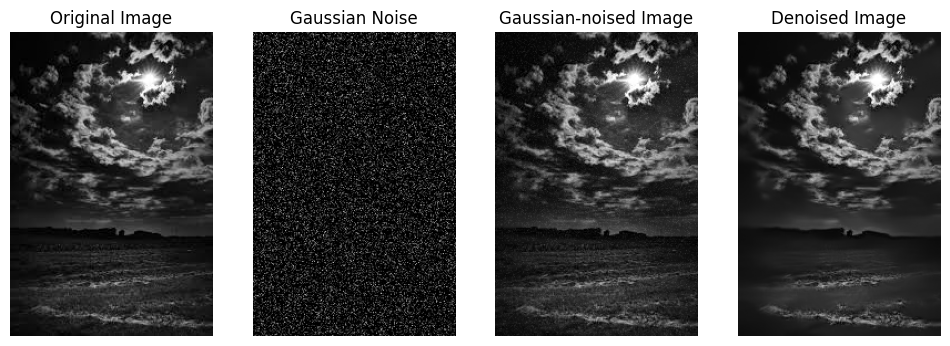

In [54]:
import matplotlib.pyplot as plt

# Generate gaussian noise with the same size as the grayscale image
gaussian_noise = np.zeros_like(grayscale_image, dtype=np.uint8)
cv2.randn(gaussian_noise, 0, 10)

# Add the noise to the grayscale image
gaussian_noised_img = cv2.add(grayscale_image, gaussian_noise)

figure = plt.figure(figsize=(12, 12))

# OG Image
figure.add_subplot(1, 4, 1)
plt.imshow(grayscale_image, cmap="grey")
plt.axis('off')
plt.title('Original Image')

# Gaussian Noise Image
figure.add_subplot(1, 4, 2)
plt.imshow(gaussian_noise, cmap="grey")
plt.axis('off')
plt.title('Gaussian Noise')

# Gaussian-noised Image
figure.add_subplot(1, 4, 3)
plt.imshow(gaussian_noised_img, cmap="grey")
plt.axis('off')
plt.title('Gaussian-noised Image')

# Denoised Image
denoised_img = cv2.fastNlMeansDenoising(gaussian_noised_img, None, 10, 9)

figure.add_subplot(1, 4, 4)
plt.imshow(denoised_img, cmap="grey")
plt.axis('off')
plt.title('Denoised Image')



## Add Uniform Noise

Text(0.5, 1.0, 'Uniformly Noised Image')

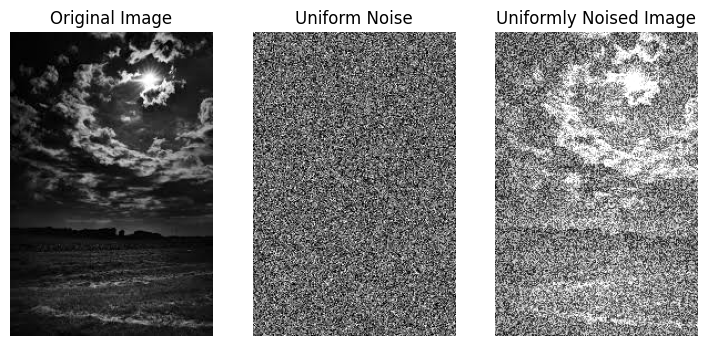

In [32]:
# Generate uniform noise with the same size as the grayscale image
uniform_noise = np.zeros_like(grayscale_image, dtype=np.uint8)
cv2.randu(uniform_noise, 0, 255)
uniform_noise = (uniform_noise * 0.8).astype(np.uint8)


# Add the noise to the grayscale image
gaussian_noised_img = cv2.add(grayscale_image, uniform_noise)

figure = plt.figure(figsize=(12, 12))

# OG Image
figure.add_subplot(1, 4, 1)
plt.imshow(grayscale_image, cmap="grey")
plt.axis('off')
plt.title('Original Image')

# Uniform Noise Image
figure.add_subplot(1, 4, 2)
plt.imshow(gaussian_noise, cmap="grey")
plt.axis('off')
plt.title('Uniform Noise')

# Gaussian-noised Image
figure.add_subplot(1, 4, 3)
plt.imshow(gaussian_noised_img, cmap="grey")
plt.axis('off')
plt.title('Uniformly Noised Image')

### Recap:
#### Types of noises:
- Impulse (Salt and Pepper)/Non-uniform noise
- Gaussian noise
- Uniform noise

#### Types of Denoising Filters:
- Median filter => best used for uniform and non-uniform noises
- NLM filter => best for gaussian noise


## Gaussian Noise on Audio
1. Create the transform

In [3]:
import librosa
import numpy as np
from abc import ABC, abstractmethod
import soundfile as sf
import simpleaudio as sa
import matplotlib.pyplot as plt

y, sr = librosa.load('audios/file_example_WAV_1MG.wav', sr = None)
sf.write('audios/file_example_WAV_1MG.wav', y, sr)
wave_obj = sa.WaveObject.from_wave_file('audios/file_example_WAV_1MG.wav')

print('Simple rate: ', sr)
print('Original length: ', len(y))

class AudioTransform:
    def __init__(self, always_apply: bool = False, p: float = 0.5):
        self.always_apply = always_apply
        self.p = p
    
    def __call__(self, y: np.ndarray, **params) -> np.ndarray:
        """
        Checks probability and applies the transformation if needed.
        """
        if self.always_apply or np.random.rand() < self.p:
            return self.apply(y, **params)
        return y
    
class AddGaussianNoise(AudioTransform):
    def __init__(self, always_apply = False, p = 0.5, max_noise_amplitude = 0.05):
        """
        Adds Gaussian noise to audio.

        """
        super().__init__(always_apply, p)
        self.noise_amplitude = (0.0, max_noise_amplitude)

    def apply(self, y: np.ndarray):
        noise_amplitude = np.random.uniform(*self.noise_amplitude)
        noise = np.random.randn(len(y))
        augmented = (y + noise * noise_amplitude).astype(y.dtype)
        return augmented

Simple rate:  44100
Original length:  262094


2. Apply the trasform

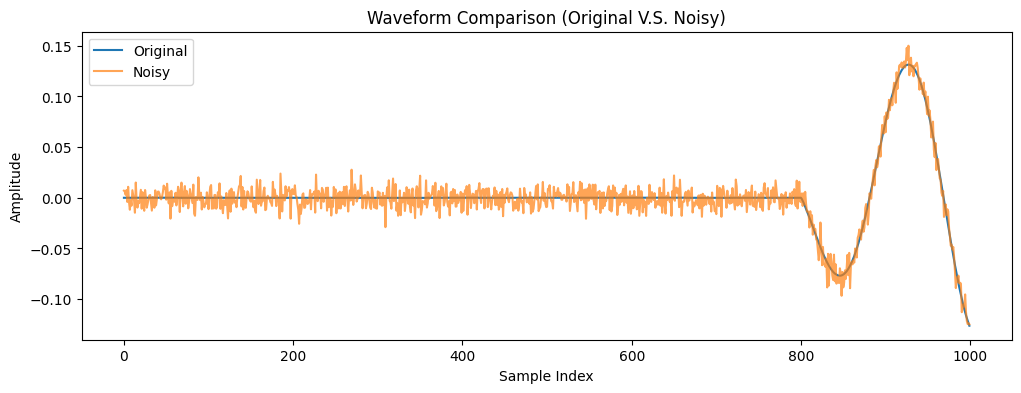

In [ ]:
transform = AddGaussianNoise(always_apply = True, max_noise_amplitude = 0.05)
y_noisy = transform(y)

plt.figure(figsize=(12, 4))
plt.plot(y[:1000], label = 'Original')
plt.plot(y_noisy[:1000], label = 'Noisy', alpha = 0.7)
plt.legend()
plt.title('Waveform Comparison (Original V.S. Noisy)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

## Remove Noise using Wiener Filter

In [2]:
import numpy as np
from scipy.signal import wiener
import scipy.io.wavfile as wavfile

# Load the noisy audio
fs, noisy_signal = wavfile.read('audios/noisy_audio.wav')

# Normalize the noisy signal
noisy_signal = noisy_signal / np.max(np.abs(noisy_signal))

# Apply Wiener filter to reduce noise

filtered_signal = wiener(noisy_signal)

# Save the filtered audio and convert back from float to int16 (standard dtype of wav files)
filtered_signal = (filtered_signal * 32797).astype(np.int16)

wavfile.write('filtered_audio.wav', fs, filtered_signal)
